## House Price Prediction using Linear, Ridge and Lasso Regression

## 1. Data Understanding and Exploration

In [966]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [967]:
houses = pd.read_csv("train.csv")

In [968]:
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [969]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [970]:
houses_numeric = houses.select_dtypes(include=['float64', 'int64'])
houses_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [971]:
column_list = list(houses.columns)
print(type(column_list))
print(column_list)

numeric_column_list = list(houses_numeric.columns)
print(type(numeric_column_list))
print(numeric_column_list)
print(len(numeric_column_list))

<class 'list'>
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [972]:
categorical_column_list = []
for i in range(0, len(column_list)):
    if column_list[i] not in numeric_column_list:
        categorical_column_list.append(column_list[i])
print(type(categorical_column_list))
print(categorical_column_list)
print(len(categorical_column_list))

<class 'list'>
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43


In [973]:
houses['MSZoning'].astype('category').value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [974]:
houses['Street'].astype('category').value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

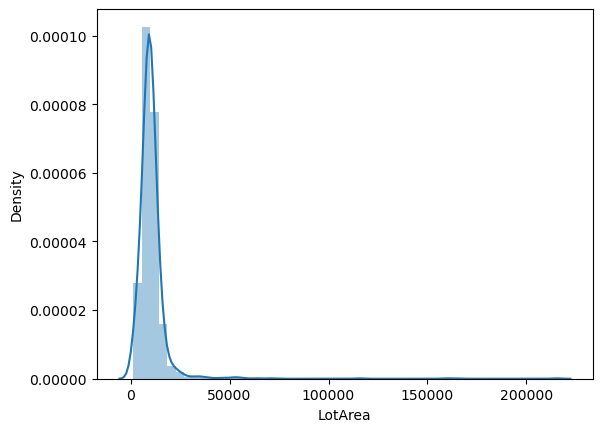

In [975]:
sns.distplot(houses['LotArea'])
plt.show()

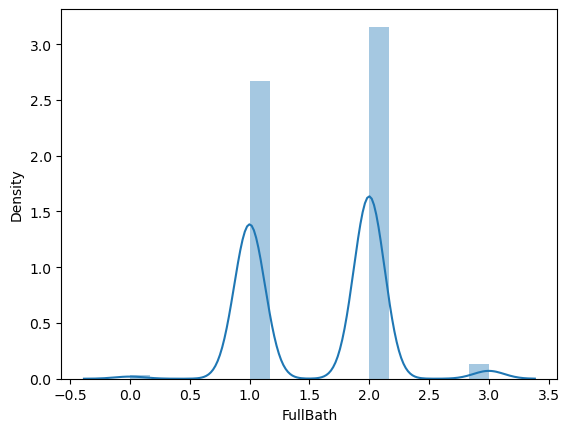

In [976]:
sns.distplot(houses['FullBath'])
plt.show()

## 2. Data Cleaning

In [977]:
houses_numeric = houses_numeric.drop(['Id'], axis=1)
houses_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [978]:
houses_numeric.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [979]:
houses_numeric["LotFrontage"] = houses_numeric["LotFrontage"].fillna(houses_numeric["LotFrontage"].mean())
houses_numeric["GarageYrBlt"] = houses_numeric["GarageYrBlt"].fillna(houses_numeric["GarageYrBlt"].mode()[0])
houses_numeric["MasVnrArea"] = houses_numeric["MasVnrArea"].fillna(houses_numeric["MasVnrArea"].mean())

In [980]:
houses_numeric = houses_numeric.drop(["MSSubClass"], axis = 1)

In [981]:
houses_numeric.isnull().sum()

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [982]:
cor = houses_numeric.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.122156,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114184,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


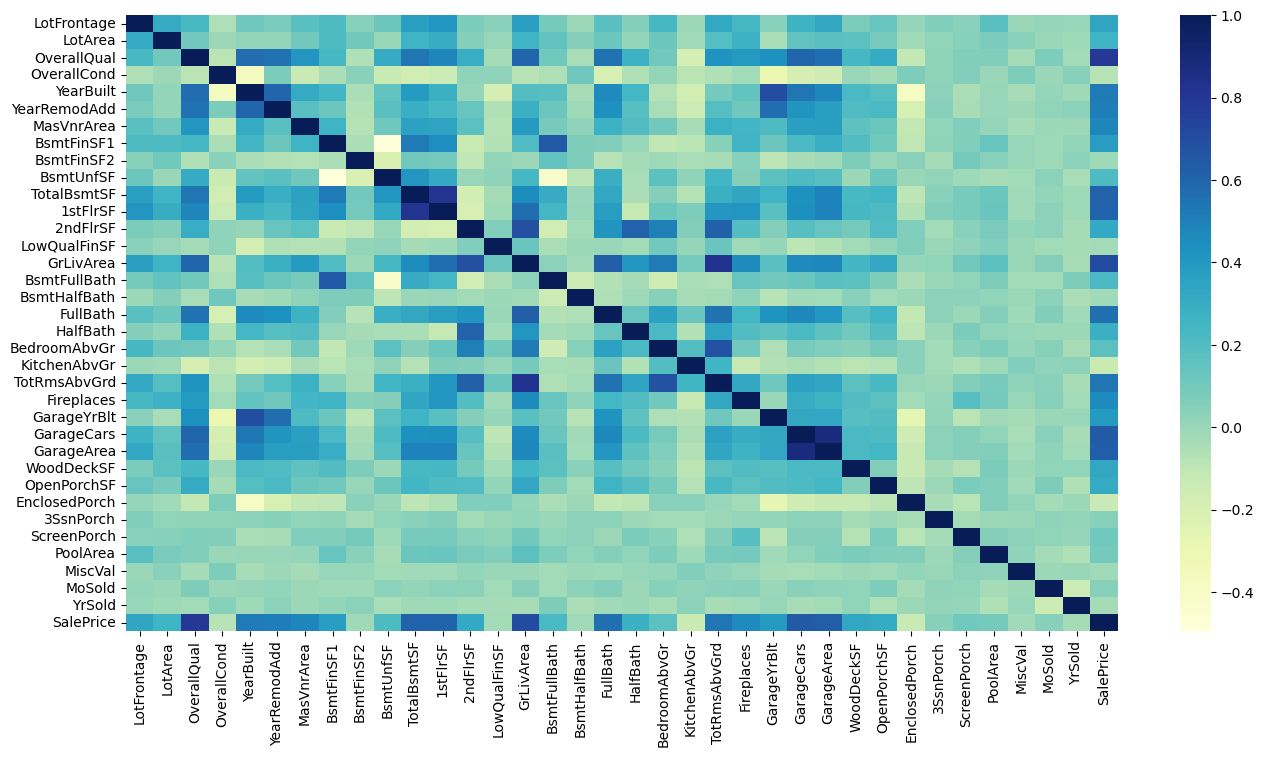

In [983]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=False)
plt.show()


In [984]:
houses_numeric = houses_numeric.drop(['SalePrice'], axis=1)

In [985]:
categorical_total_len = 0
for i in range(0, len(categorical_column_list)):
    categorical_total_len += len(houses[categorical_column_list[i]].value_counts())
    print(houses[categorical_column_list[i]].value_counts())
print (categorical_total_len)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker   

In [986]:
houses_categorical = houses.loc[:, categorical_column_list]
houses_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [987]:
houses_categorical.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [988]:
houses_categorical = houses_categorical.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 
                                              'MiscFeature'], axis=1)

In [989]:
houses_categorical["BsmtQual"] = houses_categorical["BsmtQual"].fillna(houses_categorical["BsmtQual"].mode()[0])
houses_categorical["BsmtCond"] = houses_categorical["BsmtCond"].fillna(houses_categorical["BsmtCond"].mode()[0])
houses_categorical["BsmtExposure"] = houses_categorical["BsmtExposure"].fillna(houses_categorical["BsmtExposure"].mode()[0])
houses_categorical["BsmtFinType1"] = houses_categorical["BsmtFinType1"].fillna(houses_categorical["BsmtFinType1"].mode()[0])
houses_categorical["BsmtFinType2"] = houses_categorical["BsmtFinType2"].fillna(houses_categorical["BsmtFinType2"].mode()[0])
houses_categorical["Electrical"] = houses_categorical["Electrical"].fillna(houses_categorical["Electrical"].mode()[0])
houses_categorical["GarageType"] = houses_categorical["GarageType"].fillna(houses_categorical["GarageType"].mode()[0])
houses_categorical["GarageFinish"] = houses_categorical["GarageFinish"].fillna(houses_categorical["GarageFinish"].mode()[0])
houses_categorical["GarageQual"] = houses_categorical["GarageQual"].fillna(houses_categorical["GarageQual"].mode()[0])
houses_categorical["GarageCond"] = houses_categorical["GarageCond"].fillna(houses_categorical["GarageCond"].mode()[0])

In [990]:
houses_categorical.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [991]:
houses["MSSubClass"] = houses.MSSubClass.apply(lambda x : "class" + str(x))
houses_categorical = pd.concat([houses_categorical, houses["MSSubClass"]], axis = 1)

## 3. Data Preparation 

In [992]:
houses_dummies = pd.get_dummies(houses_categorical, drop_first=True)
houses_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,MSSubClass_class30,MSSubClass_class40,MSSubClass_class45,MSSubClass_class50,MSSubClass_class60,MSSubClass_class70,MSSubClass_class75,MSSubClass_class80,MSSubClass_class85,MSSubClass_class90
0,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [993]:
X = houses_numeric

In [994]:
X = pd.concat([X, houses_dummies], axis = 1)
X.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_class30,MSSubClass_class40,MSSubClass_class45,MSSubClass_class50,MSSubClass_class60,MSSubClass_class70,MSSubClass_class75,MSSubClass_class80,MSSubClass_class85,MSSubClass_class90
0,65.000000,8450,7,5,2003,2003,196.0,706,0,150,...,False,False,False,False,True,False,False,False,False,False
1,80.000000,9600,6,8,1976,1976,0.0,978,0,284,...,False,False,False,False,False,False,False,False,False,False
2,68.000000,11250,7,5,2001,2002,162.0,486,0,434,...,False,False,False,False,True,False,False,False,False,False
3,60.000000,9550,7,5,1915,1970,0.0,216,0,540,...,False,False,False,False,False,True,False,False,False,False
4,84.000000,14260,8,5,2000,2000,350.0,655,0,490,...,False,False,False,False,True,False,False,False,False,False
5,85.000000,14115,5,5,1993,1995,0.0,732,0,64,...,False,False,False,True,False,False,False,False,False,False
6,75.000000,10084,8,5,2004,2005,186.0,1369,0,317,...,False,False,False,False,False,False,False,False,False,False
7,70.049958,10382,7,6,1973,1973,240.0,859,32,216,...,False,False,False,False,True,False,False,False,False,False
8,51.000000,6120,7,5,1931,1950,0.0,0,0,952,...,False,False,False,True,False,False,False,False,False,False
9,50.000000,7420,5,6,1939,1950,0.0,851,0,140,...,False,False,False,False,False,False,False,False,False,False


In [995]:
X_column_list = list(X.columns)
print(X_column_list)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood

In [996]:
y = houses["SalePrice"]

In [997]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [998]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 242 entries, LotFrontage to MSSubClass_class90
dtypes: bool(207), float64(3), int64(32)
memory usage: 694.5 KB


In [999]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [1000]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'MSSubClass_class30', 'MSSubClass_class40', 'MSSubClass_class45',
       'MSSubClass_class50', 'MSSubClass_class60', 'MSSubClass_class70',
       'MSSubClass_class75', 'MSSubClass_class80', 'MSSubClass_class85',
       'MSSubClass_class90'],
      dtype='object', length=242)

In [1001]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_class30,MSSubClass_class40,MSSubClass_class45,MSSubClass_class50,MSSubClass_class60,MSSubClass_class70,MSSubClass_class75,MSSubClass_class80,MSSubClass_class85,MSSubClass_class90
0,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,...,-0.222721,-0.052414,-0.091035,-0.330791,1.970518,-0.207020,-0.105263,-0.203395,-0.117851,-0.192177
1,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,...,-0.222721,-0.052414,-0.091035,-0.330791,-0.507481,-0.207020,-0.105263,-0.203395,-0.117851,-0.192177
2,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,-0.301643,...,-0.222721,-0.052414,-0.091035,-0.330791,1.970518,-0.207020,-0.105263,-0.203395,-0.117851,-0.192177
3,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,-0.061670,...,-0.222721,-0.052414,-0.091035,-0.330791,-0.507481,4.830459,-0.105263,-0.203395,-0.117851,-0.192177
4,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,-0.174865,...,-0.222721,-0.052414,-0.091035,-0.330791,1.970518,-0.207020,-0.105263,-0.203395,-0.117851,-0.192177


In [1002]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

## 4. Model Building and Evaluation

## Linear Regression


In [1003]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [1004]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-37409674315434.12
[ 1.62908859e+03  7.08995357e+03  7.49064001e+03  6.86020740e+03
  1.35276051e+04  1.78241789e+03  2.81138958e+03  7.73690378e+14
  2.73649839e+14  7.49549754e+14 -7.44186602e+14  8.77123510e+15
  9.90433261e+15  1.10320229e+15 -1.19225509e+16  4.85628382e+02
 -1.53856103e+02  8.49270169e+02 -1.26154626e+03 -3.60154524e+03
 -2.51063967e+03  1.47974383e+03  1.11173814e+03  1.53920026e+03
  2.71510936e+03  1.15665642e+03  8.15833518e+02  1.29696482e+03
  6.95527215e+01  1.11887781e+03  7.20862290e+02  4.62395012e+03
  5.35330684e+02 -5.99250000e+02 -4.55437500e+02  6.72650000e+03
  2.38525000e+03  1.01832500e+04  7.10275000e+03  2.45250000e+03
 -1.31234375e+02  2.00250000e+02 -1.93812500e+02  5.62500000e+02
 -1.14582812e+03  1.19225000e+03 -4.44500000e+02  2.11306250e+03
 -1.41150000e+03 -5.24937500e+02 -4.95000000e+01  1.03075000e+03
 -2.74387500e+03  6.08875000e+02  8.84875000e+02  1.53025000e+03
 -5.61750000e+02 -3.92500000e+02  4.37525000e+03 -1.26187500e+03
 -1.25

In [1005]:
from sklearn.metrics import r2_score, mean_squared_error

In [1006]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9405150070392145
-5.890046255691465e+20
436030648516.0803
1.1057350440701674e+33
373313911.4007537
3.786763849555368e+30


## Ridge and Lasso Regression


## Ridge Regression

In [1007]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1008]:
print(model_cv.best_params_)

{'alpha': 500}


In [1009]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.20920184e+02  2.90272915e+03  8.57560452e+03  3.11859122e+03
  2.00830390e+03  2.91915382e+03  4.09812813e+03  3.03917703e+03
  8.63089463e+02  2.96933560e+02  3.77611312e+03  5.69093041e+03
  5.00507379e+03 -4.90727231e+02  8.29914953e+03  2.34062246e+03
  1.31919773e+02  3.91589021e+03  2.19911793e+03 -3.30928739e+02
 -1.75227070e+03  4.95772928e+03  3.81907939e+03  1.13544313e+03
  4.40937353e+03  3.27122677e+03  1.66514432e+03  9.40117485e+02
  3.66235927e+00  1.14961811e+03  1.03765215e+03  1.30039976e+01
  2.15223812e+01 -3.72402282e+02 -3.55455425e+02  1.19621300e+03
  1.10313680e+02  1.20291557e+03 -1.17604493e+03  9.12659288e+02
  3.13964358e+02 -2.22318383e+03 -1.06725350e+03  1.30107356e+03
  4.85118751e+02  1.47747924e+03 -9.07014220e+02  1.99344202e+03
 -1.36996514e+03 -5.38107631e+02 -3.13370971e+02  9.26043948e+02
  4.42705132e+01  2.01301365e+01 -2.32452613e+02  4.74814105e+02
  8.17820064e+01 -1.10154031e+03  2.80608289e+03 -2.71901506e+03
 -1.70584749e+03 -7.25606

In [1010]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8817133108724154
0.8707261117462248
867052666630.0823
242685137467.78564
742339611.8408239
831113484.4787179


## Lasso

In [1011]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1012]:
print(model_cv.best_params_)

{'alpha': 500}


In [1013]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [1014]:
lasso.coef_

array([    -0.        ,   3958.04075998,  11882.2756702 ,   5196.245694  ,
         7517.00171578,   2239.14923303,   2839.9165643 ,   3776.29256969,
          484.40594059,     -0.        ,   2066.38930808,      0.        ,
            0.        ,  -1755.09863428,  30982.0002388 ,   2575.79078145,
            0.        ,   1855.526294  ,      0.        ,  -2381.3297884 ,
        -3445.92380862,    552.37843316,   1787.17292556,    833.71627267,
         5586.04677029,      0.        ,    627.44165315,    282.04882775,
           -0.        ,    724.79169355,    453.54525795,     -0.        ,
            0.        ,   -100.15001175,     -0.        ,    534.64650914,
           -0.        ,      0.        ,  -1393.47049002,   1445.04064075,
            0.        ,  -1545.68561837,    -98.39597987,    250.02385951,
            0.        ,    854.52279898,   -497.54597741,   2267.5872768 ,
         -898.11959406,   -456.71254911,      0.        ,    294.07660744,
            0.        ,  

In [1015]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9140455116059895
0.848217313107928
630054564216.1486
284940777532.12976
539430277.582319
975824580.5894855


In [1016]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.405150e-01,8.817133e-01,9.140455e-01
1,R2 Score (Test),-5.890046e+20,8.707261e-01,8.482173e-01
2,RSS (Train),4.360306e+11,8.670527e+11,6.300546e+11
3,RSS (Test),1.105735e+33,2.426851e+11,2.849408e+11
4,MSE (Train),1.932133e+04,2.724591e+04,2.322564e+04
5,MSE (Test),1.945961e+15,2.882904e+04,3.123819e+04


## Lets observe the changes in the coefficients after regularization


In [1017]:
betas = pd.DataFrame(index=X.columns)

In [1018]:
betas.rows = X.columns

In [1019]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [1020]:
pd.set_option('display.max_rows', None)
betas.head(242)

,Linear,Ridge,Lasso
LotFrontage,1.629089e+03,320.920184,-0.000000
LotArea,7.089954e+03,2902.729145,3958.040760
OverallQual,7.490640e+03,8575.604521,11882.275670
OverallCond,6.860207e+03,3118.591220,5196.245694
YearBuilt,1.352761e+04,2008.303898,7517.001716
YearRemodAdd,1.782418e+03,2919.153821,2239.149233
MasVnrArea,2.811390e+03,4098.128132,2839.916564
BsmtFinSF1,7.736904e+14,3039.177029,3776.292570
BsmtFinSF2,2.736498e+14,863.089463,484.405941
BsmtUnfSF,7.495498e+14,296.933560,-0.000000


## Conclusion

Linear regression overfits on training set and is not able to perform well on test set.
The optimal value of lambda for ridge and lasso regression is 500 for both.
Ridge and Lasso regression perform well both on training and test set.
Total error i.e. sum of training and test error is approximately equal for both ridge and lasso regression.
However, difference between train and test errors is lesser for ridge regression than lasso regression, and also test error is lesser for ridge regression.
Thus, ridge regression seems to perform the best.